In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
inertia = []
sil_scores = []
K_range = range(2, 11)  # Trying K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    inertia.append(kmeans.inertia_)  # Sum of squared distances (Elbow method)
    sil_scores.append(silhouette_score(X_scaled, labels))  # Silhouette score for each K


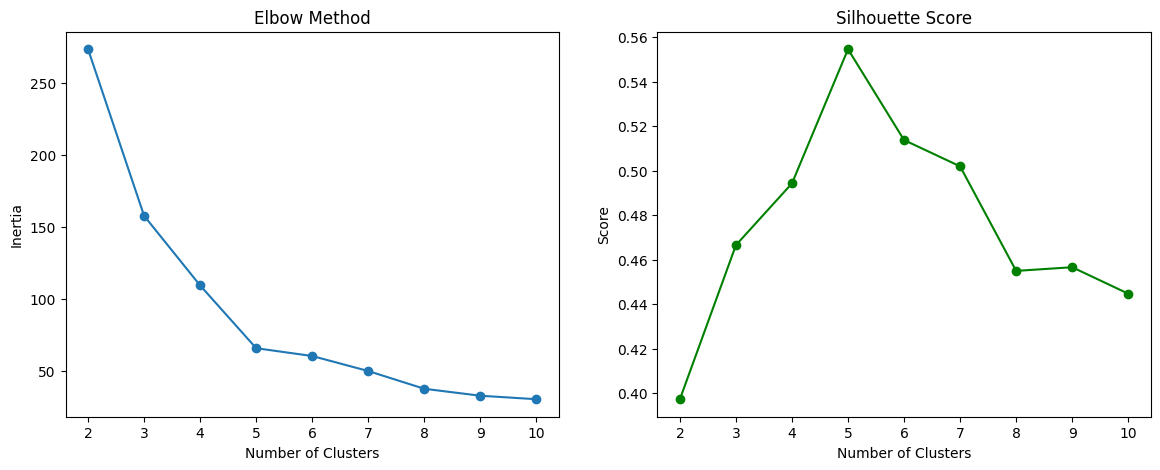

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

# Silhouette Score plot
ax[1].plot(K_range, sil_scores, marker='o', color='green')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Score')

plt.show()


In [7]:
best_k = K_range[sil_scores.index(max(sil_scores))]
print("✅ Best K based on Silhouette Score:", best_k)
print("📈 Highest Silhouette Score:", round(max(sil_scores), 3))


✅ Best K based on Silhouette Score: 5
📈 Highest Silhouette Score: 0.555


In [8]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)

df['Cluster'] = final_labels  # Add cluster info to original DataFrame


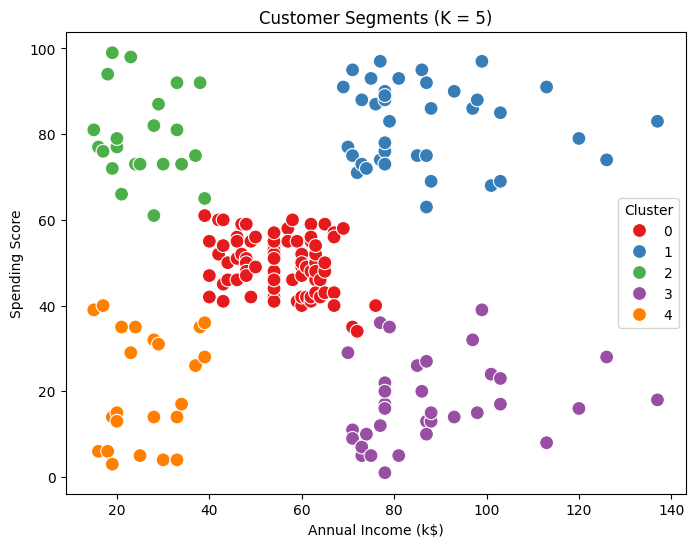

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1', s=100)
plt.title(f'Customer Segments (K = {best_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()
